# OCR

In [1]:
import requests
from PIL import Image
from io import BytesIO

In [2]:
subscription_key = '' # computer vision과 동일

In [3]:
vision_base_url = ''

In [4]:
ocr_url = vision_base_url + 'ocr'

In [23]:
image_url = "https://www.unikorea.go.kr/unikorea/common/images/content/peace.png"

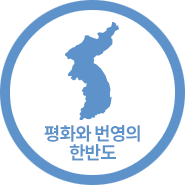

In [24]:
image = Image.open(BytesIO(requests.get(image_url).content))
image

In [25]:
headers = {'Ocp-Apim-Subscription-Key': subscription_key}
params = {'language': 'ko', 'detectOrientation': 'true'}
data = {'url': image_url}

지원하는 언어목록

- unk (AutoDetect)
- zh-Hans (ChineseSimplified)
- zh-Hant (ChineseTraditional)
- cs (Czech)
- da (Danish)
- nl (Dutch)
- en (English)
- fi (Finnish)
- fr (French)
- de (German)
- el (Greek)
- hu (Hungarian)
- it (Italian)
- ja (Japanese)
- ko (Korean)
- nb (Norwegian)
- pl (Polish)
- pt (Portuguese,
- ru (Russian)
- es (Spanish)
- sv (Swedish)
- tr (Turkish)
- ar (Arabic)
- ro (Romanian)
- sr-Cyrl (SerbianCyrillic)
- sr-Latn (SerbianLatin)
- sk (Slovak)

In [26]:
response = requests.post(ocr_url, headers=headers, params=params, json=data)

In [27]:
analysis = response.json()

In [28]:
analysis

{'language': 'ko',
 'textAngle': 0.0,
 'orientation': 'Up',
 'regions': [{'boundingBox': '45,125,95,36',
   'lines': [{'boundingBox': '45,125,95,17',
     'words': [{'boundingBox': '45,125,46,17', 'text': '평화와'},
      {'boundingBox': '95,125,45,17', 'text': '번영의'}]},
    {'boundingBox': '70,144,46,17',
     'words': [{'boundingBox': '70,144,46,17', 'text': '한반도'}]}]}]}

In [29]:
line_infos = [region["lines"] for region in analysis["regions"]]
word_infos = []

for line in line_infos:
    for word_metadata in line:
        for word_info in word_metadata["words"]:
            word_infos.append(word_info)
            
word_infos

[{'boundingBox': '45,125,46,17', 'text': '평화와'},
 {'boundingBox': '95,125,45,17', 'text': '번영의'},
 {'boundingBox': '70,144,46,17', 'text': '한반도'}]

In [11]:
import matplotlib.pyplot as plt

(-0.5, 184.5, 185.5, -0.5)

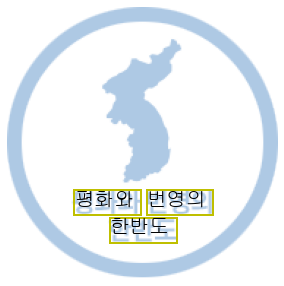

In [33]:
plt.figure(figsize=(5, 5))

plt.rcParams["font.family"] = 'New Gulim'
# or 'Nanum’
plt.rcParams["font.size"] = 10

image = Image.open(BytesIO(requests.get(image_url).content))
ax = plt.imshow(image, alpha=0.5)
for word in word_infos:
    bbox = [int(num) for num in word["boundingBox"].split(",")]
    text = word["text"]
    origin = (bbox[0], bbox[1])
    patch = plt.Rectangle(origin, bbox[2], bbox[3], fill=False, linewidth=2, color='y')
    ax.axes.add_patch(patch)
    plt.text(origin[0], origin[1], text, fontsize=20, weight="bold", va="top")
    
plt.axis("off")